In [1]:
import numpy as np
import matplotlib.pyplot as plt

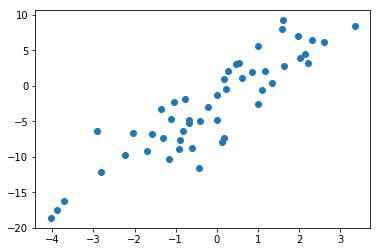

In [3]:
n = 50
x = 2*np.random.randn(n)
y = 4*x - 2 + 3*np.random.randn(n)

plt.scatter(x, y)
plt.show()

In [17]:
X = np.stack([np.ones(n), x]).T

np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y[:, np.newaxis])

array([[-2.26929501],
       [ 3.57156816]])

In [26]:
def loss(y, yhat):
    return np.mean((y - yhat)**2)

def yhat(x, coeffs):
    beta_0, beta_1 = coeffs
    return beta_0 + beta_1 * x

def grad_f(betas, x, y):
    beta_0, beta_1 = betas
    y_hat = yhat(x, betas)
    errors = (y - y_hat)
    dLdbeta0 = -2 * np.mean(errors)
    dLdbeta1 = -2 * np.mean(errors * x)
    
    return np.array([dLdbeta0, dLdbeta1])

In [33]:
def grad_descent(x, y, starting_point, iters, lr):
    
    betas = starting_point
    trajectory = [betas]
    losses = [loss(y, yhat(x, betas))]
    
    for i in range(iters):
        grad = grad_f(betas, x, y)
        betas = betas - lr * grad
        trajectory.append(betas)
        losses.append(loss(y, yhat(x, betas)))
        
    return np.array(trajectory), losses

In [36]:
betas, losses = grad_descent(x, y, np.array([0.0, 0.0]), 50, 0.01)

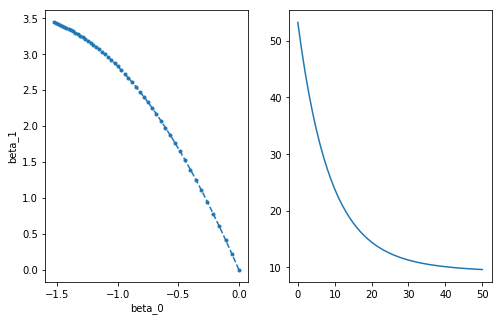

In [47]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.plot(betas[:, 0], betas[:, 1], '.--')
plt.xlabel('beta_0')
plt.ylabel('beta_1')

plt.subplot(1, 2, 2)
plt.plot(losses)

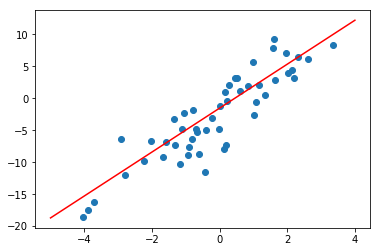

In [53]:
plt.scatter(x, y)

x_ = np.linspace(-5, 4, 100)
y_ = yhat(x_, betas[-1])
plt.plot(x_, y_, 'r')